# Simetría del espacio de esfuerzos principales

In [1]:
from numpy import sin, cos, array, deg2rad, pi, sqrt
from numpy.linalg import norm
from matplotlib.pyplot import figure, quiver, plot, text, axis, xlabel, ylabel, show

In [2]:
# Esfuerzos principales
sigma1 =  5  # Pa
sigma2 =  1  # Pa
sigma3 = -1  # Pa

In [3]:
# Seis permutaciones de los esfuerzos principales
sigma = array([[sigma1, sigma2, sigma3],   # permutación 1
               [sigma1, sigma3, sigma2],   # permutación 2
               [sigma2, sigma1, sigma3],   # permutación 3
               [sigma2, sigma3, sigma1],   # permutación 4
               [sigma3, sigma1, sigma2],   # permutación 5
               [sigma3, sigma2, sigma1]])  # permutación 6

Las proyecciones de los esfuerzos  $\sigma_1$, $\sigma_2$ y $\sigma_3$ sobre el plano $\pi$ están dadas por:
\begin{align}
\sigma_E &= \frac{\sigma_3 - \sigma_2}{\sqrt{2}} &
\sigma_F &= \frac{2\sigma_1 - \sigma_2 - \sigma_3}{\sqrt{6}}
\end{align}

In [4]:
# Proyectar las permutaciones en el plano pi
sE = (sigma[:,2] - sigma[:,1])/sqrt(2)
sF = (2*sigma[:,0] - sigma[:,1] - sigma[:,2])/sqrt(6)

Se grafican las proyecciones de los ejes de coordenadas $\sigma_1$, $\sigma_2$ y $\sigma_3$ sobre el plano $\pi$:

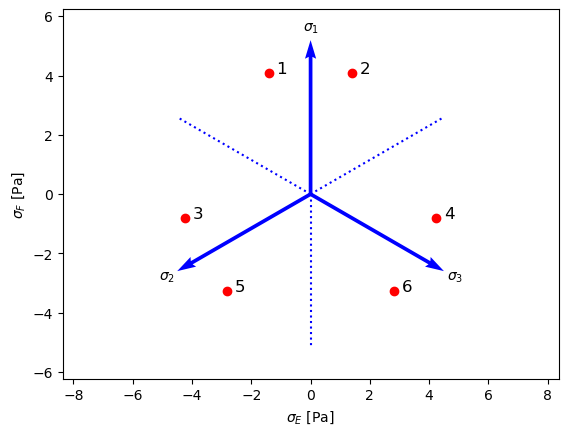

In [5]:
# Longitud de los ejes
L = norm([sigma1, sigma2, sigma3])

# Función para graficar los ejes
def dibujar_eje(texto, angulo, L):    
    ang_r = deg2rad(angulo)
    quiver(0, 0, L*cos(ang_r), L*sin(ang_r), color='b', linestyle='-', scale_units='xy', scale=1)
    plot([0, L*cos(ang_r + pi)], [0, L * sin(ang_r + pi)], color='b', linestyle=':')
    text(1.08*L*cos(ang_r), 1.08*L*sin(ang_r), texto, horizontalalignment='center', verticalalignment='center')

# Graficar los ejes
figure()
dibujar_eje(r'$\sigma_1$',  90, L)
dibujar_eje(r'$\sigma_2$', 210, L)
dibujar_eje(r'$\sigma_3$', 330, L)

# Graficar las permutaciones de esfuerzos en el plano pi
plot(sE, sF, 'ro')
for i, (x, y) in enumerate(zip(sE, sF)):
    text(x + 0.05*L, y, str(i + 1), fontsize=12)

# Ajustar los ejes y agregar etiquetas
axis('equal')
axis(1.2*array([-L, L, -L, L]))
xlabel(r'$\sigma_E$ [Pa]')
ylabel(r'$\sigma_F$ [Pa]')
show()